# Import Libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer


from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,roc_curve, roc_auc_score
import warnings

df = pd.read_csv('../../65 Years of Weather Data Bangladesh (1948 - 2013).csv')

# Category A

In [2]:
# Players to be selected
# li = ["Chittagong (City-Ambagan)", "Chittagong (IAP-Patenga)", "Sandwip", "Sitakunda", "Kutubdia", "Cox's Bazar","Teknaf", "Sylhet", "Srimangal", "Rangamati"]

# df_new=df[df.Station_Names.isin(li)]
df_new=df.drop(labels=["No","Max_Temp","Station_Names","YEAR","Month","ALT","Station_Number"], axis=1)
df_new.head()

,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,X_COR,Y_COR,LATITUDE,LONGITUDE,Period
0,12.3,0.0,68.0,0.453704,0.6,7.831915,536809.8,510151.9,22.7,90.36,1949.01
1,14.1,0.0,77.0,0.453704,0.8,7.831915,536809.8,510151.9,22.7,90.36,1950.01
2,12.3,0.0,77.0,0.453704,0.6,7.831915,536809.8,510151.9,22.7,90.36,1951.01
3,12.3,2.0,77.0,0.453704,1.0,7.831915,536809.8,510151.9,22.7,90.36,1952.01
4,13.3,10.0,75.0,0.453704,1.6,7.831915,536809.8,510151.9,22.7,90.36,1953.01


In [3]:
z = df_new["Wind_Speed"]

df_new = df_new.drop(labels=["Wind_Speed","X_COR","Y_COR","Bright_Sunshine"], axis=1)
df_new['Wind_Speed'] = z
df_new.head()

,Min_Temp,Rainfall,Relative_Humidity,Cloud_Coverage,LATITUDE,LONGITUDE,Period,Wind_Speed
0,12.3,0.0,68.0,0.6,22.7,90.36,1949.01,0.453704
1,14.1,0.0,77.0,0.8,22.7,90.36,1950.01,0.453704
2,12.3,0.0,77.0,0.6,22.7,90.36,1951.01,0.453704
3,12.3,2.0,77.0,1.0,22.7,90.36,1952.01,0.453704
4,13.3,10.0,75.0,1.6,22.7,90.36,1953.01,0.453704


In [4]:
X = df_new.iloc[:,:-1]
Y = df_new.iloc[:,-1]

In [5]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.2)

# Preprocessiong with Standard Scaler 

In [6]:
# Standard Scaler

from sklearn.preprocessing import StandardScaler

# numeric=['Max_Temp', 'Min_Temp','Rainfall', 'Relative_Humidity', 'Cloud_Coverage', 'LATITUDE', 'LONGITUDE', 'Period']
# scaler = sc.fit_transform(trainX[numeric])

sc=StandardScaler()
scaler = sc.fit(trainX)
trainX_scaled = scaler.transform(trainX)
testX_scaled = scaler.transform(testX)


# Random Forest Regression

In [7]:
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(trainX, trainY) 

#  Prediction
Y_pred_RF = regressor.predict(testX)

df_temp = pd.DataFrame({'Actual': testY, 'Predicted': Y_pred_RF})
df_temp.head()

,Actual,Predicted
3177,1.100000,1.510556
8950,2.800000,1.498463
4547,0.594444,0.770315
9011,2.200000,2.724259
18503,0.200000,0.590362


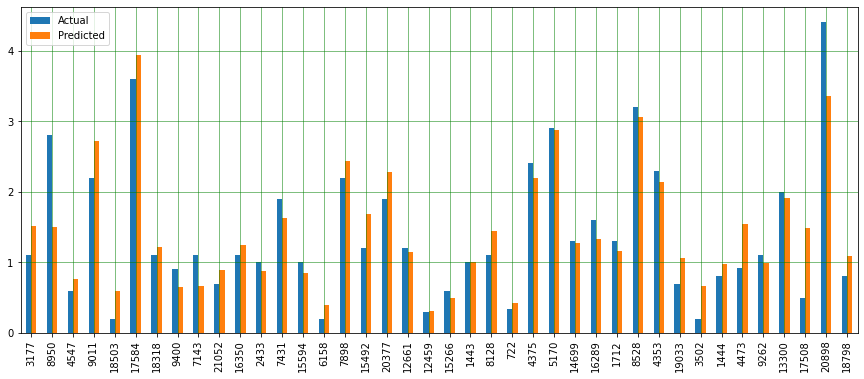

In [8]:
df_temp = df_temp.head(40)
df_temp.plot(kind='bar',figsize=(15,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
# plt.show()

In [9]:
from sklearn.metrics import r2_score
score= r2_score(testY,Y_pred_RF)
print(score)

0.756508930384002


In [10]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(testY, Y_pred_RF))  
print('Mean Squared Error:', metrics.mean_squared_error(testY, Y_pred_RF))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testY, Y_pred_RF)))

Mean Absolute Error: 0.3501299309231842
Mean Squared Error: 0.27075609260076533
Root Mean Squared Error: 0.5203422840792062


# XGBoost Regression

In [11]:
from xgboost import XGBRegressor

RegModel=XGBRegressor(max_depth=3, learning_rate=0.1, n_estimators=500, objective='reg:linear', booster='gbtree')
XGB=RegModel.fit(trainX_scaled,trainY)
prediction_XGB=XGB.predict(testX_scaled)

[09:27:08] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


In [12]:
df_temp = pd.DataFrame({'Actual': testY, 'Predicted': prediction_XGB})
df_temp.head()

,Actual,Predicted
3177,1.100000,3.201819
8950,2.800000,1.219996
4547,0.594444,0.643005
9011,2.200000,2.295332
18503,0.200000,0.581637


In [13]:
#Measuring Goodness of fit in Training data
from sklearn import metrics
print('R2 Value:',metrics.r2_score(testY, prediction_XGB))

print('Mean Absolute Error:', metrics.mean_absolute_error(testY, prediction_XGB))  
print('Mean Squared Error:', metrics.mean_squared_error(testY, prediction_XGB))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testY, prediction_XGB)))

R2 Value: 0.7190266853155957
Mean Absolute Error: 0.38214147246855634
Mean Squared Error: 0.3124354290652646
Root Mean Squared Error: 0.5589592373914798


In [14]:
parameters = {
    'n_estimators': [3000, 3500],
    'max_depth': [1,2,3,4],
}
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(XGB, parameters,cv=5,n_jobs=-1)
grid.fit(trainX_scaled, trainY)

print(grid.best_params_)

BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.

In [ ]:
grid_predictionsXGB = grid.predict(testX_scaled) 
df_temp2 = pd.DataFrame({'Actual': testY, 'Predicted': grid_predictionsXGB})
df_temp2.head()

In [ ]:
#Measuring Goodness of fit in Training data
from sklearn import metrics

print('R2 Value:',metrics.r2_score(testY, grid_predictionsXGB))

print('Mean Absolute Error:', metrics.mean_absolute_error(testY, grid_predictionsXGB))  
print('Mean Squared Error:', metrics.mean_squared_error(testY, grid_predictionsXGB))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testY, grid_predictionsXGB)))

# MLP Regression

In [ ]:
# MLPRegressor

from sklearn.neural_network import MLPRegressor

mlp_reg = MLPRegressor(hidden_layer_sizes=(150,100,50),
                       max_iter = 300,activation = 'relu',
                       solver = 'adam')

mlp_reg.fit(trainX_scaled, trainY)

In [ ]:
y_pred = mlp_reg.predict(testX_scaled)
df_temp = pd.DataFrame({'Actual': testY, 'Predicted': y_pred})
df_temp.head()

In [ ]:
df_temp = df_temp.head(30)
df_temp.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
# plt.show()

In [ ]:
plt.plot(mlp_reg.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')

In [ ]:
from sklearn.metrics import r2_score
score= r2_score(testY,y_pred)
score

In [ ]:
param_grid = {
    'hidden_layer_sizes': [(150, 100, 50)],
    'max_iter': [50, 100],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant','adaptive'],
}

from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(mlp_reg, param_grid, n_jobs= -1, cv=5)
grid.fit(trainX_scaled, trainY)

print(grid.best_params_) 

In [ ]:
grid_predictions = grid.predict(testX_scaled) 
df_temp2 = pd.DataFrame({'Actual': testY, 'Predicted': grid_predictions})
df_temp2.head()

In [ ]:
df_temp2 = df_temp2.head(30)
df_temp2.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
# plt.show()

In [ ]:
#Measuring Goodness of fit in Training data
from sklearn import metrics
print('R2 Value:',metrics.r2_score(testY, grid_predictions))

print('Mean Absolute Error:', metrics.mean_absolute_error(testY, grid_predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(testY, grid_predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testY, grid_predictions)))

In [ ]:
mean_pred=( Y_pred_RF+grid_predictionsXGB+ grid_predictions)/3
df_temp2 = pd.DataFrame({'Actual': testY, 'pred_RF': Y_pred_RF,'pred_XGB':prediction_XGB,'pred_MLP': grid_predictions,'mean_pred':mean_pred})
df_temp2.head()

In [ ]:
df_temp2 = df_temp2.head(30)
df_temp2.plot(kind='bar',figsize=(25,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

In [ ]:
mean_pred=( Y_pred_RF+prediction_XGB+ grid_predictions)/3
df_temp2 = pd.DataFrame({'Actual': testY, 'mean_pred':mean_pred})
df_temp2.head()

In [ ]:
print('R2 Value:',metrics.r2_score(testY, mean_pred)*100,"%")
print('Mean Absolute Error:', metrics.mean_absolute_error(testY, mean_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(testY, mean_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testY, mean_pred)))

In [ ]:
# from sklearn.model_selection import train_test_split
# trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.2)

# Ridge Regression 

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[0.001,0.01,0.1]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(trainX,trainY)

In [ ]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

In [ ]:
prediction_ridge=ridge_regressor.predict(testX)
import seaborn as sns

sns.distplot(testY-prediction_ridge)

In [ ]:
df_temp2 = pd.DataFrame({'Actual': testY, 'RR_pred':prediction_ridge})
df_temp2.head()

In [ ]:
print('R2 Value:',metrics.r2_score(testY, prediction_ridge)*100,"%")
print('Mean Absolute Error:', metrics.mean_absolute_error(testY, prediction_ridge))  
print('Mean Squared Error:', metrics.mean_squared_error(testY, prediction_ridge))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testY, prediction_ridge)))

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(trainX,trainY)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

In [ ]:
prediction_lasso=lasso_regressor.predict(testX)
import seaborn as sns

sns.distplot(testY-prediction_ridge)

In [ ]:
df_temp2 = pd.DataFrame({'Actual': testY, 'RR_pred':prediction_lasso})
df_temp2.head()

In [ ]:
print('R2 Value:',metrics.r2_score(testY, prediction_lasso)*100,"%")
print('Mean Absolute Error:', metrics.mean_absolute_error(testY, prediction_lasso))  
print('Mean Squared Error:', metrics.mean_squared_error(testY, prediction_lasso))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testY, prediction_lasso)))

In [ ]:
# from sklearn.model_selection import train_test_split
# trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.2)

# improve accuracy 

In [ ]:
df_new.head(3)

In [ ]:
print(f'Dataset size: {trainX.shape}')

In [ ]:
print(f'Dataset size: {testX.shape}')

In [ ]:
df_new.isnull().sum().sort_values(ascending=False)/df_new.shape[0]

In [ ]:
import seaborn as sns
sns.pairplot(data=df_new, diag_kind='kde')